# Bias variance decomposition

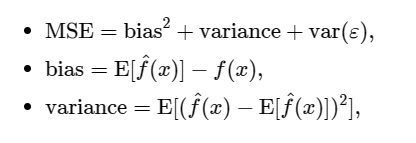

Выбор оптимальной модели
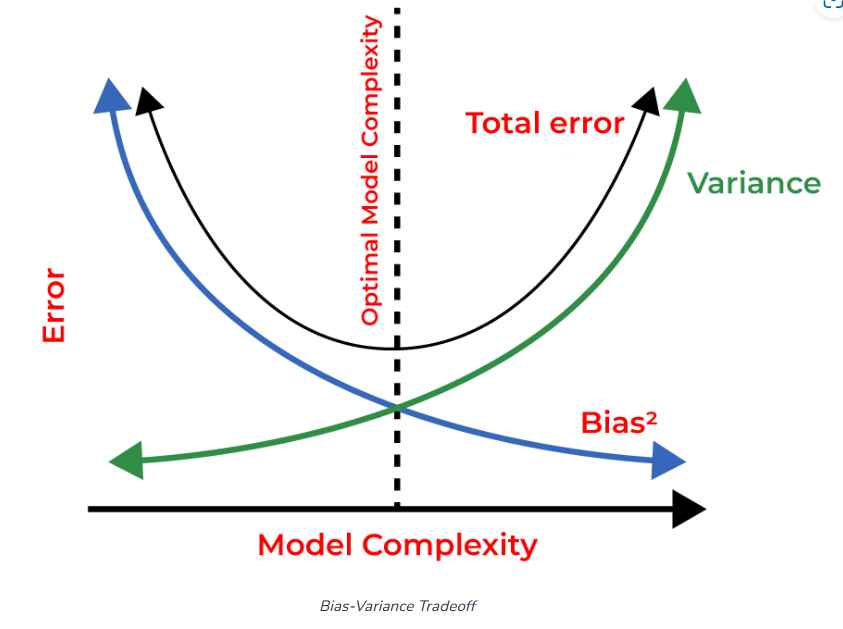

# Bias:
    - low bias  - модель использует несколько значимых особенностей для предсказания. Их достаточно, чтобы предсказывать с 
    "нормальной" точность, модель работает хорошо.
    - high bias - точность предсказания недостаточна:
        -- использовать иную модель (более сложную)
        -- увеличить количество характеристик
        -- увеличить количество данных
# Variance:
    - low var - возможно недообучение. низкий уровень подгонки значений.
    - high var - возможно переобучение. Высокий уровень реагирования на изменение в тренировочных данных.
    
 - использовать кросс валидацию для оценки bias, variance.
 - использовать более грамотный конструктор характеристик данных.
 - возможно, необходимо упростить модель.

Варианты:
- HB,LV - возможно недообучение.
- LB, HV- возможно переобучение.
- HB, HV - основные тренды данных не отображаются при предсказании, изменения в данных - тоже. Почти случайное предсказание.
- LB, LV - модель достаточно точна :)   

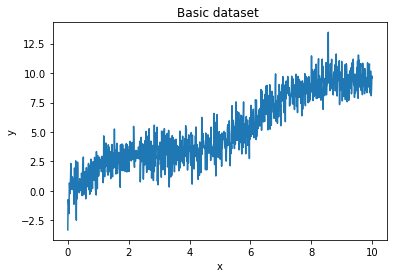

MSE:  1.3360440581783952
Bias:  1.3327254539232056
Variance:  0.003318604255189858


In [2]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split

N_total = 1000
features_num = 1
mu = 0.0
sigma = 1.0
n_classes = 5

mu_reg = 5.0
sigma_reg = 1.0

X = np.linspace(0.0001, 10.0, num=N_total)
y = X + np.sin(X) + np.random.normal(0,1,N_total)

N_steps = 50


plt.plot(X, y)  
plt.xlabel('x') 
plt.ylabel('y') 
  
plt.title('Basic dataset ') 
plt.show()


mses=  []
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=111)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

mse, bias, var = bias_variance_decomp( LinearRegression(), X_train, y_train, X_test, y_test, 
                                      loss='mse', num_rounds=10, random_seed=1)



print('MSE: ', mse)
print('Bias: ', bias)
print('Variance: ', var)

Доп материалы: https://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/